In [1]:
import pandas as pd

In [9]:
def hashPOW(key):
    """ 
    Хеш-функция возведения каждого элемента в степень
    key -- данные, которые необходимо захешировать 
    """
    d = 13
    h = 0
    for i in range(len(key)):
        h += ord(key[i]) ** d
    return h
    
def hashRS(key):
    """ 
    Хеш-функция RS
    key -- данные, которые необходимо захешировать 
    """
    a, b, h = 63689, 378551, 0
    for i in range(len(key)):
        h = h * a + ord(key[i])
        a *= b
    return h

In [3]:
class Cars:
    """
    инициализация экземпляра класса Cars:
    name -- ФИО владельца(default пустая строка)
    тип name -- string
    brand -- марка автомобиля(default пустая строка)
    тип brand -- string
    year -- год выпуска(default 0)
    тип year -- int
    number -- государственный номер(default пустая строка)
    тип number -- string
    color -- цвет(default пустая строка)
    тип color -- string 
    """
    def __init__(self, name = '', brand = '', year = 0, number = '', color = ''):
        self.name = name
        self.brand = brand
        self.year = year
        self.number = number
        self.color = color
        
    def __eq__(self, other):
        """ 
        переопределение оператора ==.
        Сравнение ведется по ФИО.
        other -- объект справа от оператора 
        возвращает: True, если объект слева = объекту справа, иначе False
        """
        if self.name == other:
            return True
        else:
            return False
        
    def __lt__(self, other):
        """ 
        переопределение оператора <.
        Сравнение ведется по ФИО.
        other -- объект справа от оператора 
        возвращает: True, если объект слева < объектa справа, иначе False 
        """
        if self.name < other:
            return True
        else:
            return False
        
    def __gt__(self, other):
        """ 
        переопределение оператора >.
        Сравнение ведется по ФИО.
        other -- объект справа от оператора 
        возвращает: True, если объект слева > объектa справа, иначе False 
        """
        if self.name > other:
            return True
        else:
            return False
        
    def __le__(self, other):
        """ 
        переопределение оператора <=.
        Сравнение ведется по ФИО.
        other -- объект справа от оператора 
        возвращает: True, если объект слева <= объектa справа, иначе False
        """
        if self.name <= other:
            return True
        else:
            return False
        
    def __ge__(self, other):
        """
        переопределение оператора >=.
        Сравнение ведется по ФИО.
        other -- объект справа от оператора 
        возвращает: True, если объект слева >= объектa справа, иначе False
        """
        if self.name >= other:
            return True
        else:
            return False
        
    def __repr__(self):
        """
        Вывод экземпляра класса
        """
        return '%r' % self.__dict__

In [4]:
from collections import defaultdict

class HashTable:
    """ 
    Инициализация экземпляра класса HashTable (default):
    default table -- хеш-таблица (default: пустой defaultdict) 
    default collisions -- число коллизий (default: 0) 
    """
    def __init__(self):
        self.table = defaultdict(list)
        self.collision = 0
        
    def addPOW(self, object):
        """
        Добавление в хеш-таблицу хеша, посчитанного с помощью хеш-функции POW 
        object -- объект, для которого считается хеш и который добавляется в хеш-таблицу 
        """
        if self.table[hashPOW(object.name)]:
            self.collision += 1
        self.table[hashPOW(object.name)].append(object)
        
    def addRS(self, object):
        """ 
        Добавление в хеш-таблицу хеша, посчитанного с помощью хеш-функции RS 
        object -- объект, для которого считается хеш и который добавляется в хеш-таблицу
        """
        if self.table[hashRS(object.name)]:
            self.collision += 1
        self.table[hashRS(object.name)].append(object)
        
    def search(self, hashh):
        """ 
        Поиск хеша в хеш-таблице
        Возвращает объекты, хеш которых равен искомому. В случае, если такого нет, возвращается пустой список
        hashh -- хеш, который ищется 
        """
        return self.table[hashh]

In [5]:
def binary(mas, st):
    """ 
    бинарный поиск:
    Выводит найденные элементы, равные образцу.
    mas -- последовательность отсортированных по неубыванию объектов, среди которых необходимо произвести поиск
    st -- объект, который необходимо найти
    """
    
    # Образец сравнивается с выбираемым средним объектом:
    # Если они равны, то объект выводится.
    # Если образец <=, чем средний объект, то происходит поиск в левой относительно среднего части mas (не включая средний)
    # Если образец >=, чем средний объект, то происходит поиск в правой относительно среднего части mas (не включая средний) 
    if len(mas) == 0:
        return 0
    else:
        mid = len(mas) // 2
        if st == mas[mid]:
            return mas[mid]
        if mas[mid] >= st:
            binary(mas[:mid], st)
        if mas[mid] <= st:
            binary(mas[mid+1:], st)

def sortmerge(m1, m2):
    """ 
    Возвращает список элементов последовательностей m1 и m2, отсортированных по неубыванию
    m1 -- последовательность объектов, отсортированных по неубыванию
    m2 -- последовательность объектов, отсортированных по неубыванию 
    """
    result = [] # возвращаемая итоговая отсортированная последовательность
    while len(m1) > 0 and len(m2) > 0: 
        # Выполняем, пока одна из последовательностей m1 или m2 не опустеет:
        # в result поочередно записываем наименьший из минимальных элементов m1 и m2
        # и удаляем его из соответствующей последовательности 
        if m1[0] < m2[0]:
            result.append(m1[0])
            m1.pop(0)
        else:
            result.append(m2[0])
            m2.pop(0)
            
    #Из предыдущего цикла вышли, потому что одна из последовательностей m1 или m2 опустела:
    #находим ту, в которой еще есть отсортированные элементы, не записанные в result,
    #и конкатенируем эти последовательности 
    if len(m1) > 0:
        result = result + m1
    elif len(m2) > 0:
        result = result + m2
    return result
            
def merge(mas):
    """ 
    Алгоритм сортировки слиянием (рекурсивный):
    возвращает список отсортированных по неубыванию объектов
    mas -- последовательность объектов, которую необходимо отсортировать 
    """
    
    # Делим исходную последовательность на элементы по одному объекту,
    # далее соседние между собой по-особенному(функцией sortmerge) конкатенируем.
    # Полученные соседние группы так же между собой этой функцией конкатенируются.
    # И т.д., пока не получится одна группа, которая и будет отсортированной последовательностью
    if len(mas) < 2:
        return mas
    else:
        mid = len(mas) // 2
        left = merge(mas[:mid])
        right = merge(mas[mid:])
        return sortmerge(left, right)

In [6]:
from time import time
import random

sizes = [100, 500, 1000, 5000, 10000, 50000, 100000]
collisionsPOW, collisionsRS = [], []
POW_time, RS_time, binarysort_time = [], [], []

df = pd.DataFrame()
for j in range(len(sizes)):
    # В таблицу df записываются данные о владельцах машин из файла 
    df = pd.read_excel('df{}.xlsx'.format(sizes[j]))
    tablePOW, tableRS, cars = HashTable(), HashTable(), []
    for i in range(sizes[j]): 
        # Создание хеш-таблиц с POW хешами и RS хешами экземляров класса Car 
        # и списка экземляров класса Cars 
        tablePOW.addPOW(Cars(name = df.iloc[i]['name'], brand = df.iloc[i]['car'], year = df.iloc[i]['year'], number = df.iloc[i]['number'], color = df.iloc[i]['color']))
        tableRS.addRS(Cars(name = df.iloc[i]['name'], brand = df.iloc[i]['car'], year = df.iloc[i]['year'], number = df.iloc[i]['number'], color = df.iloc[i]['color']))
        cars.append(Cars(name = df.iloc[i]['name'], brand = df.iloc[i]['car'], year = df.iloc[i]['year'], number = df.iloc[i]['number'], color = df.iloc[i]['color']))
    # ФИО, которое будем искать, задается как рандомное ФИО из списка ФИО массива данных
    finds = random.choice(df['name'])
    print('n =', sizes[j], '\n', 'Ищем данные о владельцах по имени', finds)
    
    # Засечение времени поиска хеша ФИО finds в таблице хешей, посчитанных функцией POW 
    
    hh1 = hashPOW(finds)
    tic = time()
    hp = tablePOW.search(hh1)
    toc = time()
    POW_time.append(toc-tic)
     
    # Засечение времени поиска хеша ФИО finds в таблице хешей, посчитанных функцией RS 
    hh = hashRS(finds)
    tic = time()
    hr = tableRS.search(hh)
    toc = time()
    RS_time.append(toc-tic)
     
    # Засечение времени бинарного поиска ФИО finds 
    sortcars = merge(cars)
    tic = time()
    binary(sortcars, finds)
    toc = time()
    binarysort_time.append(toc-tic)
     
    # Запоминание числа коллизий в хеш-таблице RS и POW 
    print('POW:', hp, '\n', 'RS:', hr, '\n')
    collisionsPOW.append(tablePOW.collision)
    collisionsRS.append(tableRS.collision)

n = 100 
 Ищем данные о владельцах по имени Самойлов Орест Анисимович
POW: [{'name': 'Самойлов Орест Анисимович', 'brand': 'KIA', 'year': 1969, 'number': 'ц668пе 55', 'color': 'Светло-голубой'}] 
 RS: [{'name': 'Самойлов Орест Анисимович', 'brand': 'KIA', 'year': 1969, 'number': 'ц668пе 55', 'color': 'Светло-голубой'}] 

n = 500 
 Ищем данные о владельцах по имени Зыкова Марина Тимуровна
POW: [{'name': 'Зыкова Марина Тимуровна', 'brand': 'Suzuki', 'year': 1993, 'number': 'а487св 90', 'color': 'Коралловый'}] 
 RS: [{'name': 'Зыкова Марина Тимуровна', 'brand': 'Suzuki', 'year': 1993, 'number': 'а487св 90', 'color': 'Коралловый'}] 

n = 1000 
 Ищем данные о владельцах по имени Гусев Бажен Ермолаевич
POW: [{'name': 'Гусев Бажен Ермолаевич', 'brand': 'Chevrolet', 'year': 2015, 'number': 'ц934фц 2', 'color': 'Шоколадный'}] 
 RS: [{'name': 'Гусев Бажен Ермолаевич', 'brand': 'Chevrolet', 'year': 2015, 'number': 'ц934фц 2', 'color': 'Шоколадный'}] 

n = 5000 
 Ищем данные о владельцах по имени 

[]

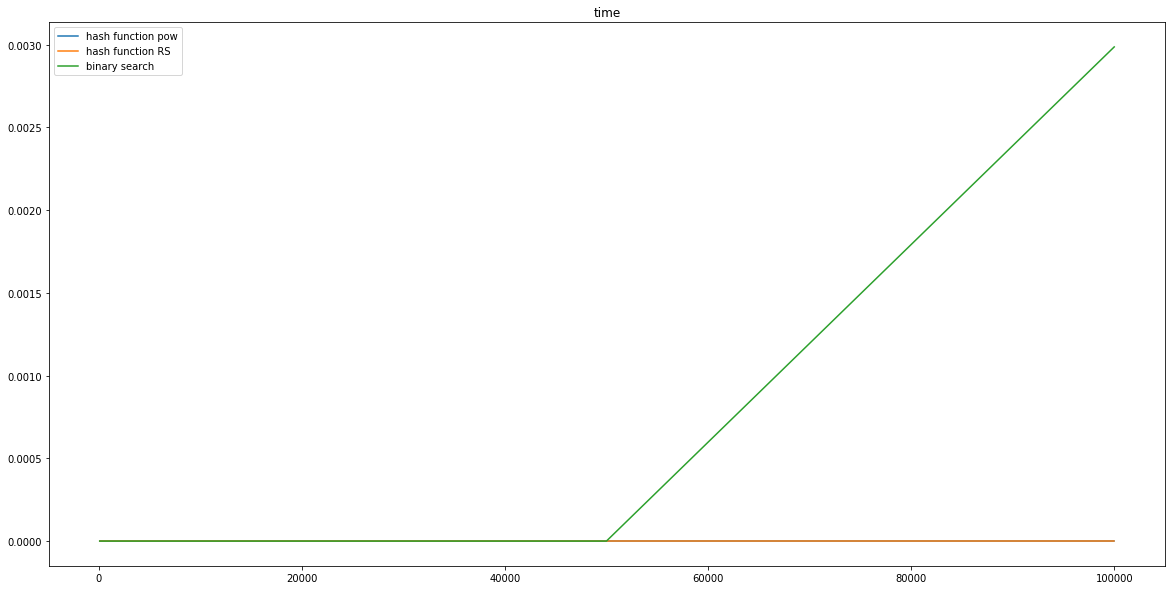

In [21]:
# Построение графика зависимости времени поиска от величины массива данных 
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(sizes, POW_time, label = 'hash function pow')
ax.plot(sizes, RS_time, label = 'hash function RS')
ax.plot(sizes, binarysort_time, label = 'binary search')
ax.legend()
ax.set_title('time')
ax.plot()

[]

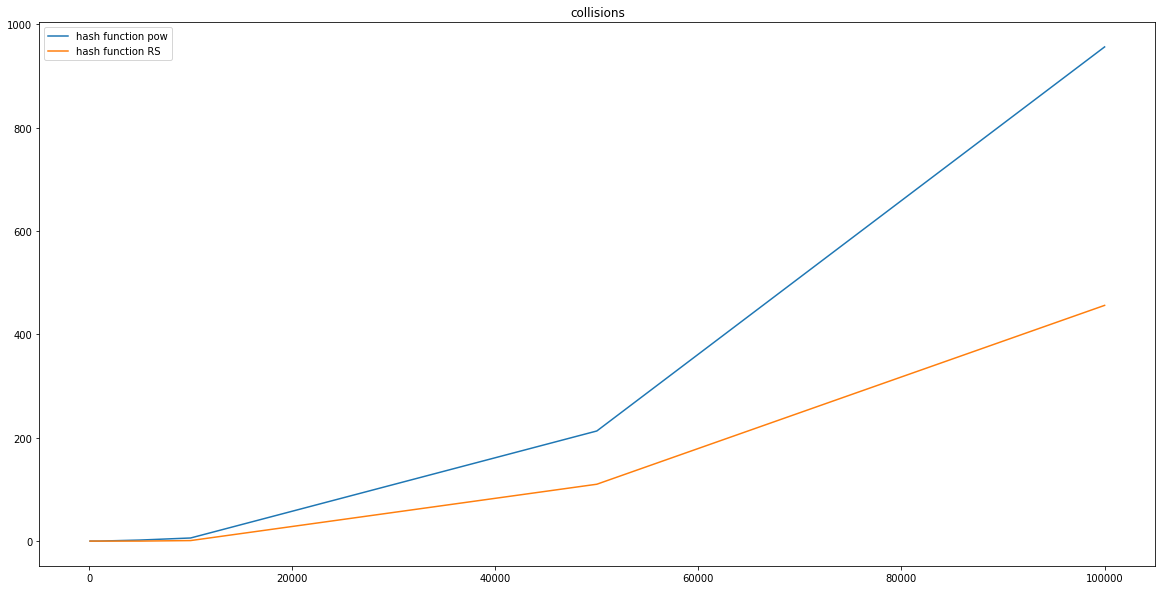

In [20]:
# Построение графика зависимости числа коллизий от величины массива данных для хеш-функций RS и POW
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(sizes, collisionsPOW, label = 'hash function pow')
ax.plot(sizes, collisionsRS, label = 'hash function RS')
ax.legend()
ax.set_title('collisions')
ax.plot()